Example of linear congruential generator (inspired by M. D'Elia)

X_(k+1) = mod(a*X_k + c,m)   ->   x_k = X_k/m 

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def cong_rand_gen(seed, len_loop, a, c, m):
    
    #define the empty array of final results
    x_arr = np.empty(len_loop)
    y_arr = np.empty(len_loop)

    xk = seed
    for i in range(1,len_loop):
        xtemp = xk*a + c  #linear transformation
        xkp1 = xtemp % m  #this is the mod(xtemp,m)=xtemp - m*(xtemp/m) operation
        xk = xkp1     #Notice that going through xkp1 is useless, could save one line,just for the sake of clarity.. 
        x = float(xk)/float(m)  #x in [0,1), the actual random number 
        x_arr[i] = x
    
        #we repeat twice to plot a pair of consecutive random numbers in the sequence
        xtemp = xk*a + c  
        xkp1 = xtemp % m 
        xk = xkp1      
        y = float(xk)/float(m)
        y_arr[i] = y
        
    return x_arr, y_arr

In [34]:
#-------------------------DEFINE QUANTITIES---------------------------#

# definition of the "modulus"
m = 10**8 + 1  # original Lehmer implementation 1949 working on ENIAC 
               # which was indeed a 8-decimal digit number machine
# m = 2147483647 # 2^31 - 1  # Park-Miller 1988, this is a Mersenne prime

# definition of the "multiplier"
a = 23     # original Lehmer implementation 1949 workin on ENIAC 
# a = 16807  # Park-Miller 1988
# a = 48271  # Park-Miller 1993

# definition of the "increment"
# when c = 0 the generator is called "multiplicative congruential generator"
c = 0       # Both Lehmer and Park-Miller implementations

# define the starting values of pseudo-random sequence
seed = 2   

# define the length of the loop
len_loop = 10000

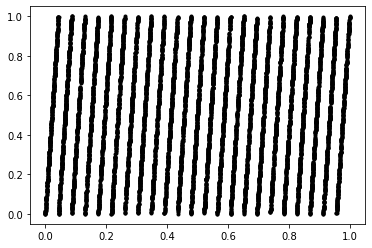

In [35]:
# Lehmer implementation
x,y = cong_rand_gen(seed, len_loop, a, c, m)

# try to plot the pairs [0,1]x[0,1] to see if they
# follow some regular structure.
plt.scatter(x,y, marker = '.', color = 'black')

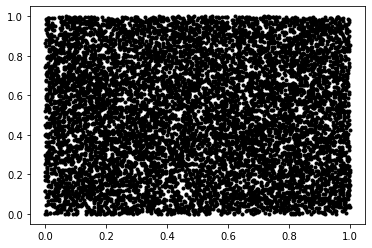

In [36]:
# Park-Miller implementation
x,y = cong_rand_gen(seed, len_loop, 48271, 0, 2147483647)

# try to plot the pairs [0,1]x[0,1] to see if they
# follow some regular structure.
plt.scatter(x,y, marker = '.', color = 'black')